# Introduction to Econometrics
We are now equipped with the statistical knowledge required to proceed to econometrics. Recall the initial labor supply model introduced at the beginning of the class. We had a supply and demand curve, and the data was generated by equating supply and demand for each individual. We wrote supply $g(H,V,U)$ and demand $f(U)$ as
$$
g(H,V,U) = a_0 + a_1H + U + V
$$
$$
f(U) = b_0 + U
$$
and assumed no corner solutions so that the equilibrium values of hours worked $H$ were obtained by equating these expressions and then wages $W$ were as follows:
$$
H = \frac{b_0-a_0}{a_1} - \frac{V}{a_1}
$$
$$
W = b_0 + U.
$$
Let's simulate some data from this model by drawing, as we did before, $U$ and $V$ repeatedly from uniform distributions on the interval $[-0.5,0.5]$ and assuming $b_0=1.5$, $a_0=1$ and $a_1=1$.

In [1]:
set.seed(210)
N = 1000
b0 = 1.5
a0 = 1
a1 = 1

U = runif(N, -0.5, 0.5)
V = runif(N, -0.5, 0.5)

H = (b0 - a0)/a1 - V/a1
W = b0 + U

data = cbind(W, H)
data[1:10,]

W,H
1.512010,0.92286591
1.835127,0.74138141
1.893077,0.66480700
1.446060,0.21813251
1.298304,0.04968035
1.081275,0.72345753
1.277436,0.23886033
1.038611,0.76322311
1.463393,0.05859564
1.200980,0.18909362


Above, we plot the first 10 observations of our simulated dataset. And below, we draw a scatter plot of all the data.

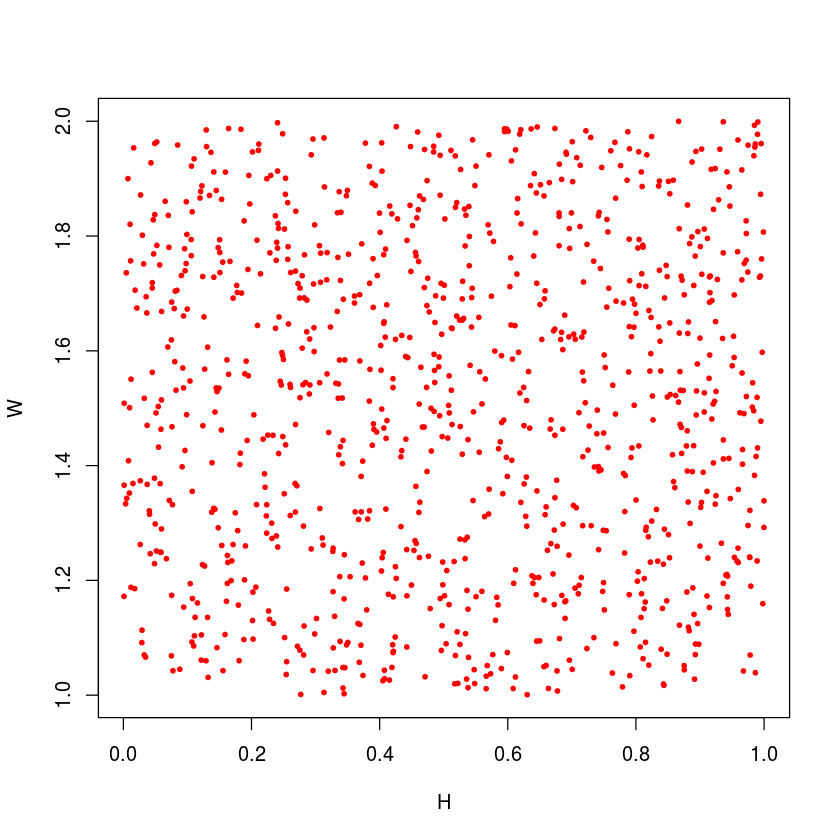

In [9]:
plot(x=H, y=W, pch=21, bg='red', col='red', cex=0.5)

We can see the apparent lack of any statistical relationship between $H$ and $W$. Indeed, when we estimate a linear regression of $W$ on $H$, we obtain a regression estimate $\hat{\beta}_{1,N}$ of the slope coefficient $\beta_1$ close to $0$. 

In [10]:
Y = W
X = cbind(rep(1, N), H)
reg = function(Y, X){solve(t(X)%*%X)%*%t(X)%*%Y}
b = reg(Y, X)
b

,1.50099812
H,0.01190324


Thus, it appears that the OLS estimator $\hat{\beta}_{1,N}$ is a biased estimator of the demand parameter $a_1$, which we know to be 1.
- Recall our previous conversation about how the use of the term "biased" is abused. And I've abused it above. Here we mean it appears that $\hat{\beta}_N$ would not converge to $a_1$, i.e., that $\hat{\beta}_{1,N}\overset{p}{\to}\beta_1\neq a_1$.

# Omitted Variable Bias
What is the cause of this bias? To understand this, let's write out $\beta_1$ and manipulate the expression to find the source of the bias.
$$
\beta_1 = \frac{Cov[H,W]}{Var[H]} = \frac{Cov[H,a_0 + a_1H + U + V]}{Var[H]}
$$
$$
= a_1 + \underbrace{\frac{Cov[H,U + V]}{Var[H]}}_{\text{bias}}
$$
$$
= a_1 + \frac{Cov[H,V]}{Var[H]}
$$
$$
= a_1 + \frac{Cov\left[\frac{b_0 - a_0}{a_1} - \frac{V}{a_1},V\right]}{Var\left[\frac{b_0 - a_0}{a_1} - \frac{V}{a_1}\right]}
$$
$$
= a_1 - \frac{\frac{1}{a_1}Var[V]}{\frac{1}{a_1^2}Var[V]} = a_1 - \frac{a_1^2}{a_1} = a_1 - a_1 = 0
$$
We have shown two things above. 
1. That $\beta_1=0$, confirming what we see as zero statistical relationship in the plot.
2. That $\beta_1\neq a_1$ and the difference is denoted by the bias term
$$
\frac{Cov[H,U + V]}{Var[H]} = \frac{Cov[H,V]}{Var[H]}, \text{ since } Cov[H,U] = 0,
$$
and which is a result of the failure to include the variable $V$ in the regression. Hence the term "omitted variable bias." Note that there is no bias, and $\beta_1=a_1$ if $Cov[H,V]=0$.
3. In fact, $=\beta_1 < a_1$, that is, $\beta_1$ is biased downward. What is the intuition for this downward bias? Consider an increase in $H$ in the data. The only heterogeneity is through $U$ and $V$ so this increase must be caused by an increase in $U$ and/or $V$. When $U$ increases, both supply and demand shift equally and hours $H$ don't change. When $V$ decreases, demand is constant, but the supply curve shifts down, increasing hours worked with no change in wages. You can see this graphically below.

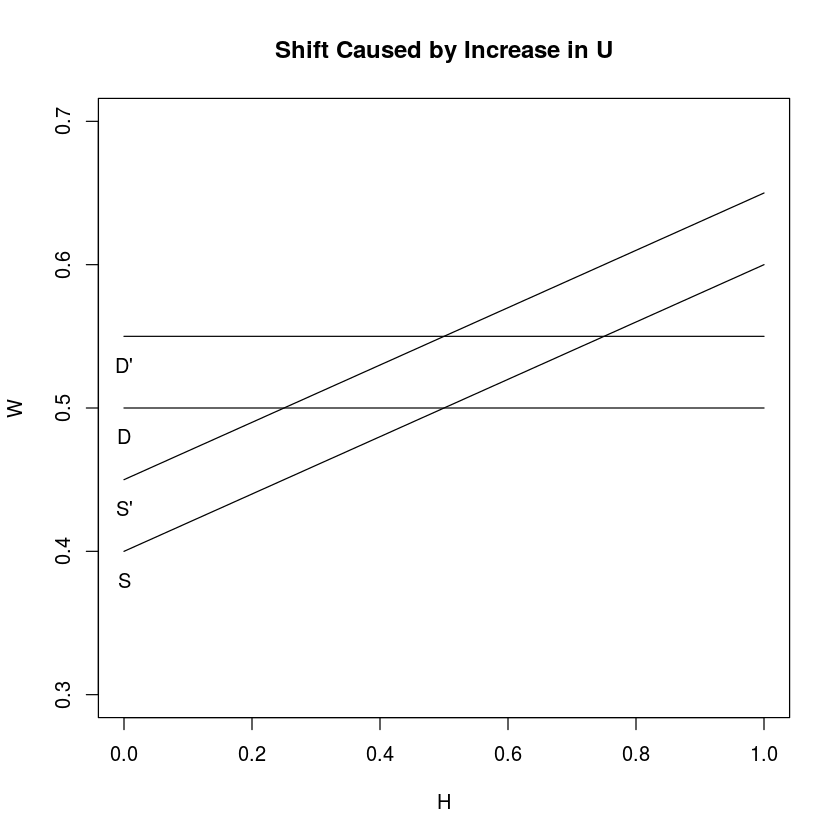

In [27]:
x = seq(0, 1, length.out=100)
plot(x=x, y=rep(0.5, 100), type='l', xlab='H', ylab='W',
    main="Shift Caused by Increase in U")
lines(x=x, y=0.4 + 0.2*x)
lines(x=x, y=rep(0.55, 100))
lines(x=x, y=0.45 + 0.2*x)
text(0, 0.38, "S")
text(0, 0.48, "D")
text(0, 0.43, "S'")
text(0, 0.53, "D'")

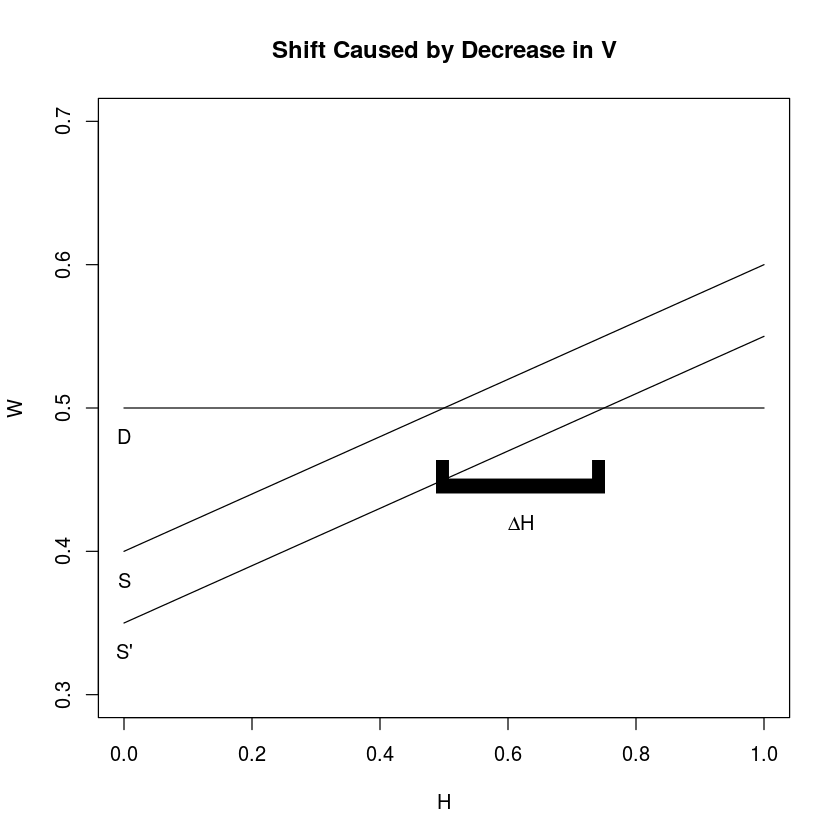

In [54]:
x = seq(0, 1, length.out=100)
plot(x=x, y=rep(0.5, 100), type='l', xlab='H', ylab='W',
    main="Shift Caused by Decrease in V")
lines(x=x, y=0.4 + 0.2*x)
lines(x=x, y=0.35 + 0.2*x)
text(0, 0.38, "S")
text(0, 0.48, "D")
text(0, 0.33, "S'")
text(x = 0.62, y = 0.45, '[', srt = 90, cex = 9)
text(0.62, 0.42, expression(paste(Delta, 'H')))

If we observed $V$ and could include it in the regression, then we could estimate $BLP(W|H,V) = \tilde{\beta}_0 + \tilde{\beta}_1H + \tilde{\beta}_2V\quad$ by OLS and obtain estimates $\hat{\tilde{\beta}}_{1,N}$. What would $\tilde{\beta}_1$ be? Letting $\tilde{W}=W - BLP(W|V)$ and $\tilde{H}=H-BLP(W|V)$, we have shown (recall the Frisch-Waugh Theorem) that $BLP(\tilde{W}|\tilde{H}) = \tilde{\beta}_0 + \tilde{\beta}_1\tilde{H}$, which implies
$$
\tilde{\beta}_1 = \frac{Cov[\tilde{H},\tilde{W}]}{Var[\tilde{H}]}
$$
$$
= \frac{E[\tilde{H}\tilde{W}]}{E[\tilde{H}^2]} = \frac{E[\tilde{H}(W - BLP(W|V))]}{E[\tilde{H}^2]}
$$
$$
= \frac{E[\tilde{H}W]}{E[\tilde{H}^2]} = \frac{E[\tilde{H}(a_0 + a_1H + U + V)]}{E[\tilde{H}^2]}
$$
$$
= a_1\frac{E[\tilde{H}H]}{E[\tilde{H}^2]} = a_1\frac{E[\tilde{H}(\tilde{H} + BLP(H|V))]}{E[\tilde{H}^2]}
$$
$$
= a_1\frac{E[\tilde{H}^2]}{E[\tilde{H}^2]} = a_1,
$$
thus proving that if we included $V$ in the regression then the OLS estimator $\hat{\tilde{\beta}}_{1,N}$ would converge to $\tilde{\beta}_1 = a_1$, our economic parameter of interest.

# Identifying Economic Relationships through Regression
Our statistics has shown that OLS obtains consistent estimates of linear regression parameters, i.e, $\hat{\beta}_N\overset{p}{\to}\beta = E[XX']^{-1}E[XY]$. But we've shown above that these regression parameters don't always correspond to our economic parameters of interest. 

Let's look at what we've done more generally, abstracting away from any specific economic model we might have in mind. Suppose we are interested in an economic model that produces a structural relationship between variables $Y$, $X$ and $V$ described by the equation

$$
Y = X'\gamma + V,
$$

where $X=(1,X_1,...,X_K)$ and $\gamma=(\gamma_0,...,\gamma_K)$ are a $(K+1)\times 1$ vector of random variables and $V$ is a random variable. We've shown that the slope coefficients $\gamma_1,...,\gamma_K$ are identified by $\beta_1,...,\beta_K$, the regression slope coefficients if $Cov[X,V]=0$. That is, $\gamma_1=\beta_1,...,\gamma_K=\beta_K$.
- Note: It is often assumed that $E[V]=0$. This assumption is innocuous; it just changes the interpretation of $\gamma_0$. In this case, $Cov[X,V]=E[XV]=0$. Thus, we will often just assume $E[V]=0$ and then consider $E[XV]=0$ as the condition for identification of $\gamma$. If $E[XV]=0$, then $\gamma=\beta$, i.e., a linear regression of $Y$ on $X$ identifies $\gamma$.
- The condition $E[XV]=0$ is often referred to as "exogeneity" and if $E[X_kV]=0$ for some particular $k$, we say that $X_k$ is exogenous or an exogenous regressor.
- In our demand relationship above, the fact that $H$ and $W$ are determined in equilibrium is what causes the model to violate exogeneity, i.e., $E[HV]\neq 0$

A good question to ask at this point would be, could we identify some components of $\gamma$ if $E[X_kV]=0$ for some values $k\in\{0,..,K\}$? As a quick example, let $K=2$, $E[V]=E[X_1V]=0$ but $E[X_2V]\neq 0$. We know from Frisch-Waugh that
$$
\beta_1 = \frac{Cov[\tilde{X}_1,\tilde{Y}]}{Var[\tilde{X}_1]}
$$
$$
= \frac{E[\tilde{X}_1\tilde{Y}]}{E[\tilde{X}_1^2]} = \frac{E[\tilde{X}_1(Y-BLP(Y|X_2))]}{E[\tilde{X}_1^2]}
$$
$$
= \frac{E[\tilde{X}_1Y]}{E[\tilde{X}_1^2]} = \frac{E[\tilde{X}_1(\gamma_0 + \gamma_1X_1 + \gamma_2X_2 + V)]}{E[\tilde{X}_1^2]}
$$
$$
= \frac{E[\tilde{X}_1(\gamma_0 + \gamma_1X_1 + \gamma_2X_2 + V)]}{E[\tilde{X}_1^2]}
$$
$$
= \gamma_1 + \frac{E[\tilde{X}_1V]}{E[\tilde{X}_1^2]} = \gamma_1 + \frac{E[(X_1-BLP(X_1|X_2))V]}{E[\tilde{X}_1^2]}
$$
$$
= \gamma_1 - \frac{E\left[\frac{Cov[X_1,X_2]}{Var[X_2]}X_2V\right]}{E[\tilde{X}_1^2]}
$$
$$
= \gamma_1 - \frac{Cov[X_1,X_2]E[X_2V]}{Var[X_2]E[\tilde{X}_1^2]},
$$
so that yes, $\beta_1$ is biased for $\gamma_1$ even though $E[X_1V]=0$ if $Cov[X_1,X_2]\neq 0$ and $E[X_2V]\neq 0$. Thus, "omitted variable bias" can contaminate supposedly "exogenous" regressors. Furthermore, it makes us think twice about throwing variables into a regression, because if $\gamma_2=0$, and we include $X_2$ in the regression, we will introduce bias into our estimate of $\gamma_1$ for no reason!
- Thus, we are left with quite a predicament. If we don't include enough regressors we may have an omitted variable bias, but if we include a regressor that does not belong, we inadvertently introduce omitted variable bias.